# 1. Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random

# 2. Write Function

In [2]:
def SVM_compute_E(W, x_train, b, y):
    E = np.dot(x_train, W) + b - y
    return E

In [3]:
def SVM_compute_eta(xi, xj, kf):
    eta = 2*kernel(xi, xj, kf) - kernel(xi, xi, kf) - kernel(xj, xj, kf)
    return eta

In [4]:
def SVM_compute_L(yi, yj, C, alpha_i, alpha_j):
    if yi == yj:
        L = max([0, alpha_i + alpha_j - C])
    elif yi != yj:
        L = max([0, alpha_j - alpha_i])
    return L

In [5]:
def SVM_compute_H(yi, yj, C, alpha_i, alpha_j):
    if yi == yj:
        H = min([C, alpha_i + alpha_j])
    elif yi != yj:
        H = min([C, C + alpha_j - alpha_i])
    return H

In [6]:
def SVM_compute_alpha_j(alpha_j, yj, Ei, Ej, eta, L, H):
    new_alpha_j = alpha_j - yj*(Ei - Ej)/eta
    if new_alpha_j < L:
        new_alpha_j = L
    elif new_alpha_j > H:
        new_alpha_j = H
    return new_alpha_j

In [7]:
def SVM_compute_b(b, Ei, Ej, new_alpha_i, old_alpha_i, new_alpha_j, old_alpha_j, yi, xi, yj, xj, C, kf):
    bi = b - Ei - (new_alpha_i - old_alpha_i)*yi*kernel(xi, xi, kf) - (new_alpha_j - old_alpha_j)*yj*kernel(xi, xj, kf)
    bj = b - Ej - (new_alpha_j - old_alpha_j)*yj*kernel(xj, xj, kf) - (new_alpha_i - old_alpha_i)*yi*kernel(xi, xj, kf)
    is_sv_i = (new_alpha_i > 0) and (new_alpha_i < C)
    is_sv_j = (new_alpha_j > 0) and (new_alpha_j < C)
    if is_sv_i and not is_sv_j:
        new_b = bi
    elif not is_sv_i and  is_sv_j:
        new_b = bj
    else:
        new_b = (bi + bj)/2
    return new_b

In [8]:
def kernel(xi, xj, kf):
    if kf[0] == 'Dot':
        return np.dot(xi, xj)
    elif kf[0] == 'Polynomial':
        p = kf[1]
        return (np.dot(xi, xj) + 1)**p
    elif kf[1] == 'RBF':
        gamma = kf[1]
        degree = np.sum((xi - xj)**2)
        return np.e**(-gamma*degree)

In [9]:
def SVM_fit(X_Train, Y_Train, C, kf, max_iteration = 1000):
    N = X_Train.shape[0]
    D = X_Train.shape[1]
    alpha = np.zeros(N)
    W = np.zeros(D)
    b = 0
    for e in range(max_iteration):
        two_dots_index = random.sample(range(N), 2)
        i = two_dots_index[0]
        xi = X_Train[i, :]
        yi = Y_Train[i, 0]
        j = two_dots_index[1]
        xj = X_Train[j, :]
        yj = Y_Train[j, 0]
        Ei = SVM_compute_E(W, xi, b, yi)
        Ej = SVM_compute_E(W, xj, b, yj)
        eta = SVM_compute_eta(xi, xj, kf)
        if eta >= 0:
            continue
        L = SVM_compute_L(yi, yj, C, alpha[i], alpha[j])
        H = SVM_compute_H(yi, yj, C, alpha[i], alpha[j])
        new_alpha_j = SVM_compute_alpha_j(alpha[j], yj, Ei, Ej, eta, L, H)
        new_alpha_i = alpha[i] + yi*yj*(alpha[j] - new_alpha_j)
        b = SVM_compute_b(b, Ei, Ej, new_alpha_i, alpha[i], new_alpha_j, alpha[j], yi, xi, yj, xj, C, kf)
        W = W + (new_alpha_i - alpha[i])*yi*xi + (new_alpha_j - alpha[j])*yj*xj
        alpha[i] = new_alpha_i
        alpha[j] = new_alpha_j
    return W, b, alpha

# 3. Read Data & Prepare Data

In [10]:
N = 100
D = 2

In [11]:
X_Train_minus = np.random.randn(50, 2)
X_Train_plus = np.random.randn(50, 2) + 4

Y_Train_minus = -np.ones([50, 1])
Y_Train_plus = np.ones([50, 1])

In [12]:
X_Train = np.vstack([X_Train_minus, X_Train_plus])
Y_Train = np.vstack([Y_Train_minus, Y_Train_plus])

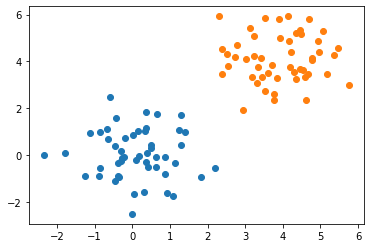

In [13]:
plt.scatter(X_Train[:50, 0], X_Train[:50, 1])
plt.scatter(X_Train[50:, 0], X_Train[50:, 1])

# 4. Create Model

In [20]:
W, b, alpha = SVM_fit(X_Train, Y_Train, 1, ['Dot'])

In [21]:
W

array([0.72293729, 0.38580668])

In [22]:
b

-1.373423121733806

In [23]:
xxx = np.linspace(-3, 7, 100)
yyy = (-W[0]/W[1])*xxx + (-b/W[1])

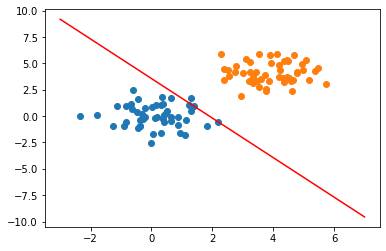

In [24]:
plt.scatter(X_Train[:50, 0], X_Train[:50, 1])
plt.scatter(X_Train[50:, 0], X_Train[50:, 1])
plt.plot(xxx, yyy, color = 'red')

In [25]:
alpha

array([0.        , 0.        , 0.00098776, 0.        , 0.        ,
       0.18702491, 0.03780889, 0.        , 0.        , 0.        ,
       0.04723672, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04550468, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01666353, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18133445,
       0.        , 0.01192868, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     